In [1]:
import root_numpy as rnp

Welcome to JupyROOT 6.22/02


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fname = '../test_50files/Run_15000_to_15500_findhits.root'

In [4]:
def loc_to_glob(lcr, localhitpos):
    space_middle = 5.8+4.4
    space_edge = 7.3+2.2
    pcb_width = 54
    hitcm_conversion_factor = 0.16875
    globhits = space_edge + (localhitpos * hitcm_conversion_factor) + lcr * (space_middle+pcb_width)
    return globhits
    

In [5]:
from functools import partial

In [6]:
gh = partial(loc_to_glob, 0)

In [7]:
lh0=rnp.root2array(fname, treename="T", branches="hits.hit0")
lh1=rnp.root2array(fname, treename="T", branches="hits.hit1")
lh2=rnp.root2array(fname, treename="T", branches="hits.hit2")

In [8]:
globalhit0 = []
for i in [0,1,2]:
    lh = rnp.root2array(fname, treename="T", branches="hits.hit{}".format(i))
    gh = partial(loc_to_glob, i)
    globalhit0.extend(list(map(gh, lh[lh!=-1])))

In [9]:
globalhit0

[18.950000000000003,
 45.44375,
 45.44375,
 16.25,
 19.11875,
 28.56875,
 18.78125,
 19.11875,
 45.44375,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.893750000000004,
 54.89375000

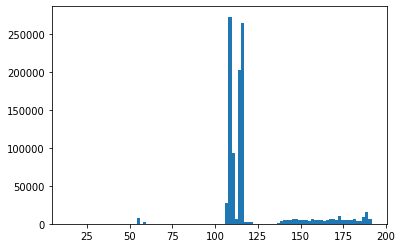

In [10]:
plt.hist(globalhit0, bins=100)
plt.show()

In [11]:
y0 = rnp.root2array(fname, treename="T", branches="globalhits.globalhit0")

In [12]:
y0[y0!=-1]

array([149.88125, 115.38125, 115.71875, ..., 109.30625, 109.30625,
       140.43125])

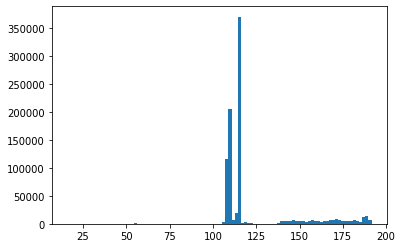

In [13]:
plt.hist(y0[y0!=-1], bins=100)
plt.show()

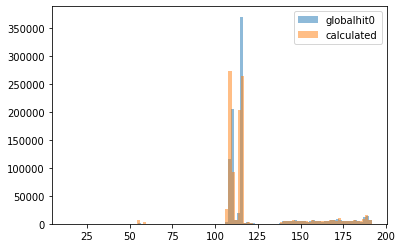

In [187]:
plt.hist(y0[y0!=-1], bins=100, alpha=0.5, label = 'globalhit0')
plt.hist(globalhit0, bins=100, alpha=0.5, label= 'calculated')
plt.legend(loc='upper right')
plt.show()

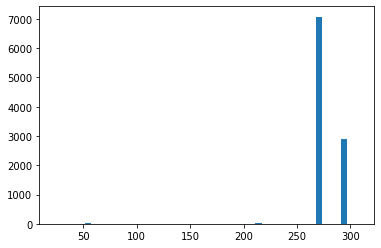

In [188]:
plt.hist(lh0[lh0!=-1], bins=50)
plt.show()

In [189]:
lh0[lh0>280]

array([294., 294., 294., ..., 291., 291., 308.])

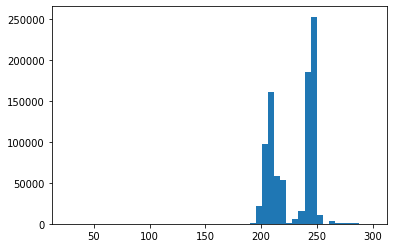

In [190]:
plt.hist(lh1[lh1!=-1], bins=50)
plt.show()

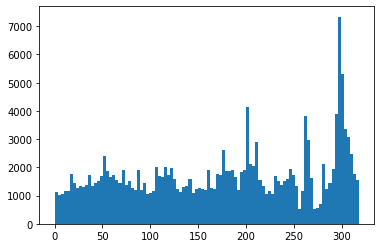

In [191]:
plt.hist(lh2[lh2!=-1], bins=100)
plt.show()

In [192]:
globalhit0 = []
for i in [0,1,2]:
    lh = rnp.root2array(fname, treename="T", branches="hits.hit{}".format(i))
    gh = partial(loc_to_glob, i)
    globalhit0.extend(list(map(gh, lh[lh!=-1])))

In [193]:
globalhits=[]
localhits = []
for g, h in enumerate(np.arange(24).reshape(8,3)):
    globalhit=[]
    for j, hh in enumerate(h):
        print('load localhit{} for globalhit{}'.format(hh, g))
        lh = rnp.root2array(fname, treename="T", branches="hits.hit{}".format(hh))
        localhits.append(lh[lh!=-1])
        gh = partial(loc_to_glob, j)
        globalhit.extend(list(map(gh, lh[lh!=-1])))
    globalhits.append(globalhit)

load localhit0 for globalhit0
load localhit1 for globalhit0
load localhit2 for globalhit0
load localhit3 for globalhit1
load localhit4 for globalhit1
load localhit5 for globalhit1
load localhit6 for globalhit2
load localhit7 for globalhit2
load localhit8 for globalhit2
load localhit9 for globalhit3
load localhit10 for globalhit3
load localhit11 for globalhit3
load localhit12 for globalhit4
load localhit13 for globalhit4
load localhit14 for globalhit4
load localhit15 for globalhit5
load localhit16 for globalhit5
load localhit17 for globalhit5
load localhit18 for globalhit6
load localhit19 for globalhit6
load localhit20 for globalhit6
load localhit21 for globalhit7
load localhit22 for globalhit7
load localhit23 for globalhit7


In [194]:
from collections import Counter

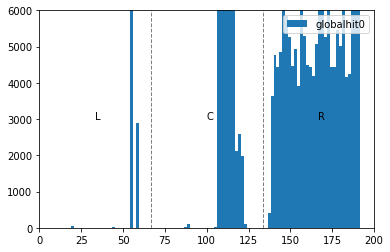

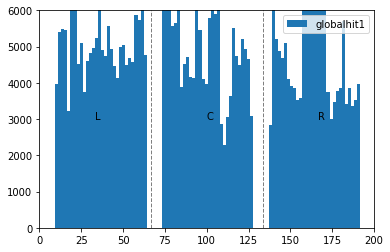

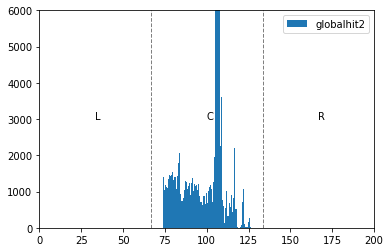

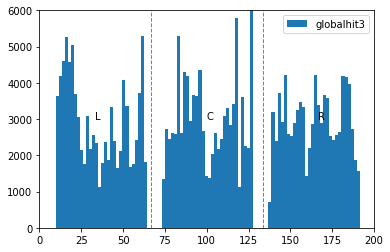

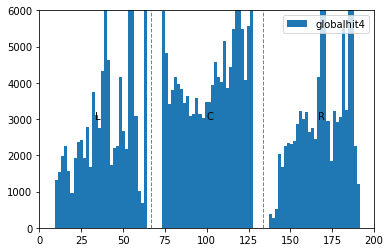

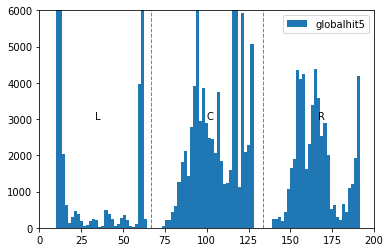

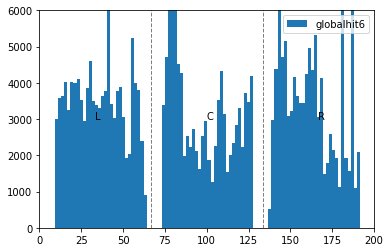

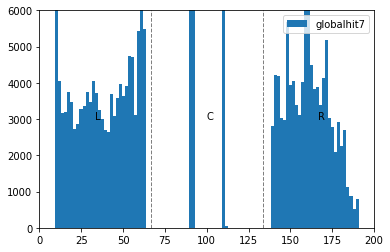

In [195]:
for i, g in enumerate(globalhits):
    plt.hist(g, bins=100, label='globalhit{}'.format(i))
    plt.axvline(x=200/3, c='grey', linestyle='--', linewidth='1')
    plt.axvline(x=(200/3)*2, c='grey', linestyle='--', linewidth='1')
    #plt.text(x=200/6,y=Counter(g).most_common(1)[0][1]/2,s='L')
    plt.text(x=200/6,y=3000,s='L')
    plt.text(x=200/2,y=3000,s='C')
    plt.text(x=(200/6)*5,y=3000,s='R')
    plt.legend(loc='upper right')
    plt.xlim(0,200)
    plt.ylim(0,6000)
    plt.show()


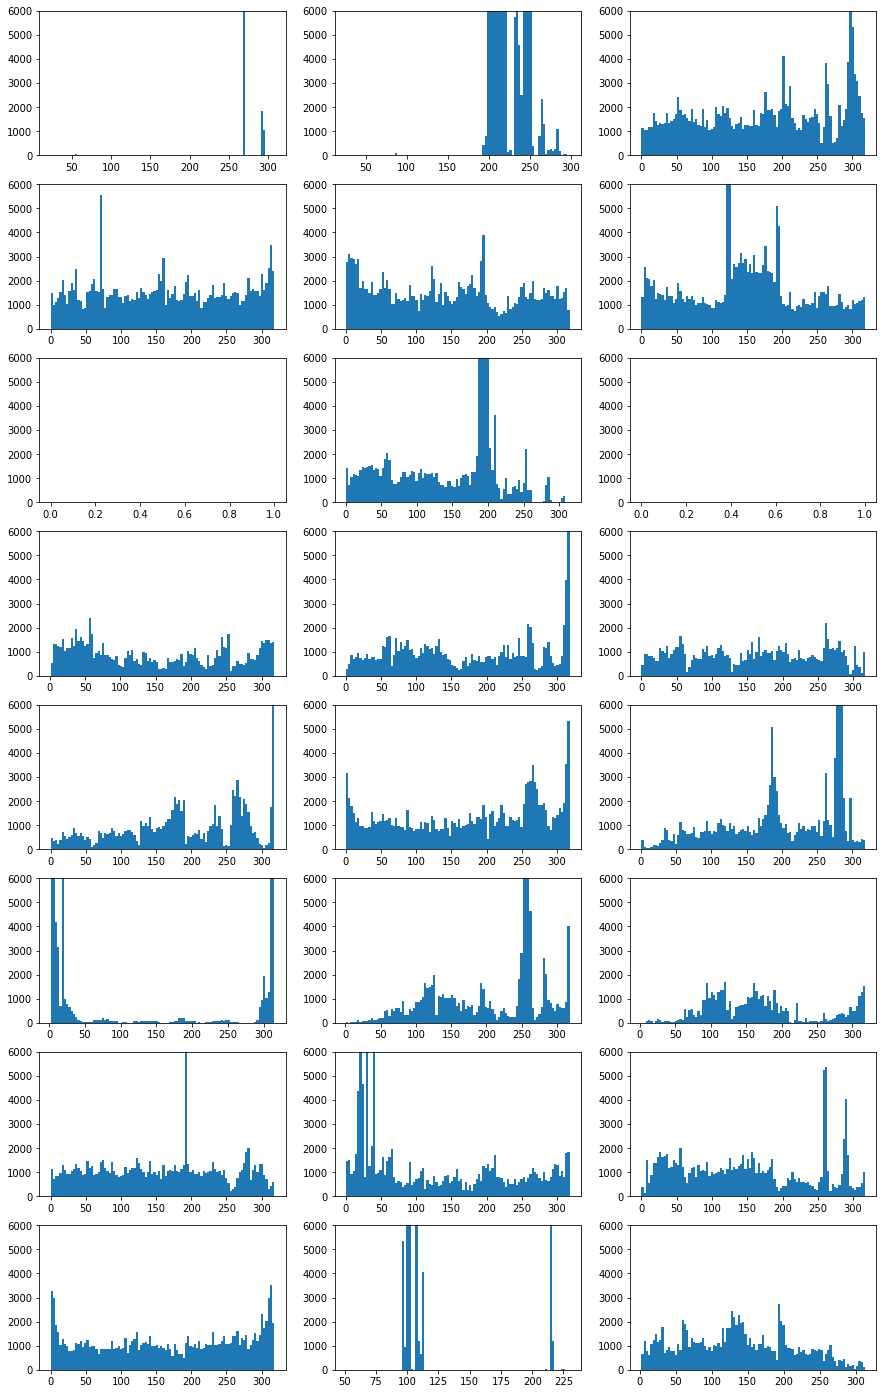

In [198]:
fig, axs = plt.subplots(8,3, figsize=(15,25))
#fig.subplots_adjust(hspace = .5, wspace=.001)
for ax, l in zip(axs.ravel(),localhits):
    ax.hist(l, bins=100)
    ax.set_ylim(0, 6000)

plt.show()

In [15]:
globalhits_hitfinder=[]
for g in range(8):
    globalhit_hf=[]
    print('load globalhit{}'.format(g))
    gh = rnp.root2array(fname, treename="T", branches="globalhits.globalhit{}".format(g))
    globalhit_hf.append(gh[gh!=-1])
    globalhits_hitfinder.append(globalhit_hf)

load globalhit0
load globalhit1
load globalhit2
load globalhit3
load globalhit4
load globalhit5
load globalhit6
load globalhit7


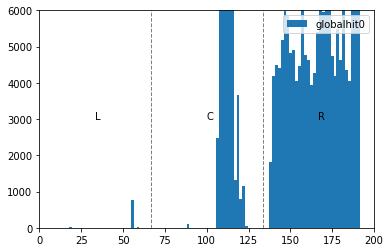

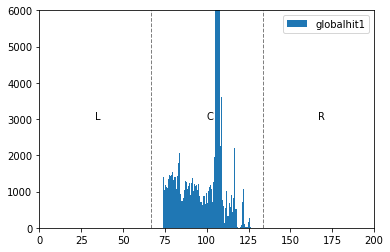

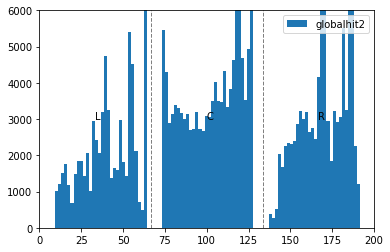

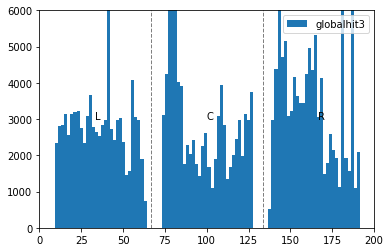

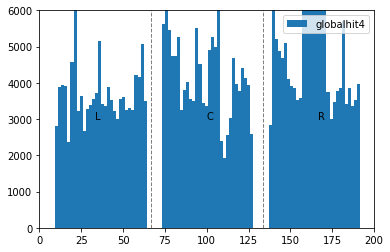

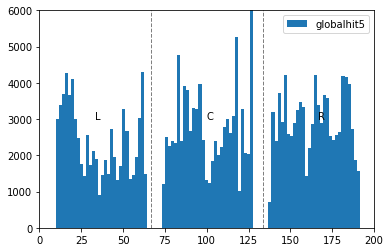

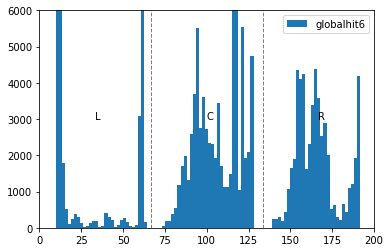

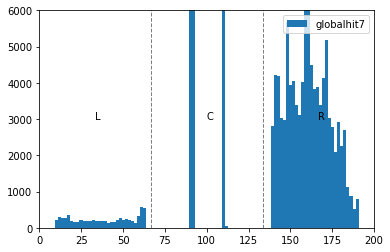

In [16]:
for i, g in enumerate(globalhits_hitfinder):
    plt.hist(g, bins=100, label='globalhit{}'.format(i))
    plt.axvline(x=200/3, c='grey', linestyle='--', linewidth='1')
    plt.axvline(x=(200/3)*2, c='grey', linestyle='--', linewidth='1')
    #plt.text(x=200/6,y=Counter(g).most_common(1)[0][1]/2,s='L')
    plt.text(x=200/6,y=3000,s='L')
    plt.text(x=200/2,y=3000,s='C')
    plt.text(x=(200/6)*5,y=3000,s='R')
    plt.legend(loc='upper right')
    plt.xlim(0,200)
    plt.ylim(0,6000)
    plt.show()

